<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 4</b>


Thank you for the updates! You can find my new comments with digit 4. You did a great job here! You learned how to build and evaluate models to predict used car prices. You have successfully conducted EDA, handled missing values and outliers. You trained and tuned several models, compared their RMSE and speed, and chose the best model for the final testing. You learned how to prepare and encode large data and how to weigh training speed vs. prediction error, and why this matters in real-world applications. I hope you enjoyed this project! I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 3</b>


You almost finished it, great job! My new comments have digit 3. There are just a couple of issues this time. Would you please take a look?
 
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>


Thank you for submitting the project! I appreciate the time you took to update it!  I've left a couple of new comments with digit 2. Would you please take a look? 

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Chris! Congratulations on submitting another project! 🎉 I will be using the standard the color marking:
    

<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    

    
- Excluded several irrelevant columns;
    
    
- Encoded cetegorical columns;    

    
- Trained two models, great!

    

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,



- Please try to explore the distributions and add conclusions. In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue; 

    
- There are several columns that can also be dropped. Please consider removing them to reduce computational cost;


    
- Check the data for the duplicates after you drop columns; 
    

    
- Please split the data first, only then we need to encode it to avoid data leakage;

  
    
- According to the task, we are supposed to measure models' training and prediction speed. Would you please measure them separately for each model?


    
- Please add a conclusion about each model; 

    
    
- We also need to tune hyperparameters. We tune them to identify the hyperparameters that will yield the desired metric value. Would you try to implement it?  



      
- Please don't use the test subset until the final test for the reason I stated in one of my comments;

    
    
- In the very end of the project, choose the best model (the one that yielded the best RMSE or 2 if they have the same metric values) and run the final test;

    
    
- Add the final conclusion please. A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. 


There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Good introduction that reflects the core goals. Well done!  
    
</div>

## Data preparation

In [12]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

In [13]:
# Load the dataset
data = pd.read_csv('/datasets/car_data.csv')

In [14]:
#data exploration
display(data.head())
display(data.info())
display(data.describe())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
The data was successfully read, well done! 
    
</div>

In [15]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Drop duplicates if any
data = data.drop_duplicates()


Duplicates: 262


In [16]:
 # Handle Duplicates
# We identify and remove duplicate rows to clean the data.
duplicates = data.duplicated().sum()
print(f'Number of Duplicates: {duplicates}')
if duplicates > 0:
    data = data.drop_duplicates()

Number of Duplicates: 0


In [17]:
# Handle Missing Values
# Handle Missing Values and Remove Irrelevant Columns

# Drop irrelevant columns to reduce computation cost
columns_to_drop = ['LastSeen', 'DateCreated', 'RegistrationYear', 'RegistrationMonth', 'PostalCode', 'NumberOfPictures', 'DateCrawled']
data.drop(columns=columns_to_drop, inplace=True)

# Define categorical columns to process (excluding now-dropped ones)
categorical_cols = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
for col in categorical_cols:
    if col in data.columns:
        data[col].fillna('unknown', inplace=True)

# Fill missing numerical values
if 'Power' in data.columns:
    data['Power'].fillna(data['Power'].median(), inplace=True)

# After dropping columns, some previously unique rows may now be duplicates
duplicates_after_dropping = data.duplicated().sum()
print(f'Number of duplicates after dropping columns: {duplicates_after_dropping}')
if duplicates_after_dropping > 0:
    data = data.drop_duplicates()

Number of duplicates after dropping columns: 73486


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


- > `data = data.drop(['NumberOfPictures', 'PostalCode'], axis=1)`
   
Agreed! We don't need these columns. 



    
- It's a good decision to fill in the gaps with some unique value, it's better than deleting them. Moreover, it is normal that sometimes sellers do not specify some information. The model should "know" about such cases. We even should not use median or mode. Even though the median does not skew the distribution, we have to many missing values to fill in because there is a risk of biasing the data.   
    
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


- You can then drop `RegistrationMonth`, `DateCreated`, `RegistrationYear`. It will significantly simplify the training process. 

    
- `DateCreated`, however, can be used to calculate the publication period. The longer an active advertisement remains published, the less likely the car is being sold, likely due to an overpriced offer.




    
- Consider comparing max dates in the `RegistrationYear` and  `DateCrawled` columns. Vehicle should not be registered after the data was downloaded :) 

    
    


- Another option is to drop `VehicleType` and `Brand`, since we have `Model` that should reflect both. 



- > `data['Power'].fillna(data['Power'].median(), inplace=True)`

Do we have any missing values here? 



- Consider analyzing categories as well. Petrol and gasoline refer to the same fuel, so we can use one of these categories. There are some other rare fuel types that can be dropped. If a category appears only in the training or validation subset, for instance, and we use `handle_unknown='ignore'`, the linear model might miss important signals in validation or make predictions with incomplete features thus breaking the assumptions of linearity. It may be helpful to make sure that training and validation subsets use the same feature columns after encoding. 


</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

- The `Model` column still has missing values.

      
- Are there any outliers in the data?  Please call the `describe` method and display charts. Drop abnormal values if they exist. Hint: `price` and `power` columns definitely have outliers.
    


- After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
</div>

Boxplot for Car Prices:


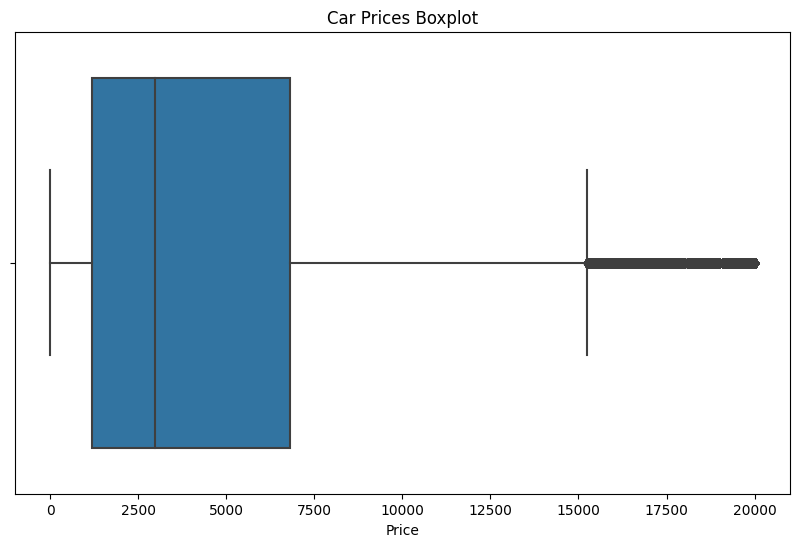

In [18]:
# Outlier Detection and Removal
print('Boxplot for Car Prices:')
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Car Prices Boxplot')
plt.show()

Boxplot for Car Power:


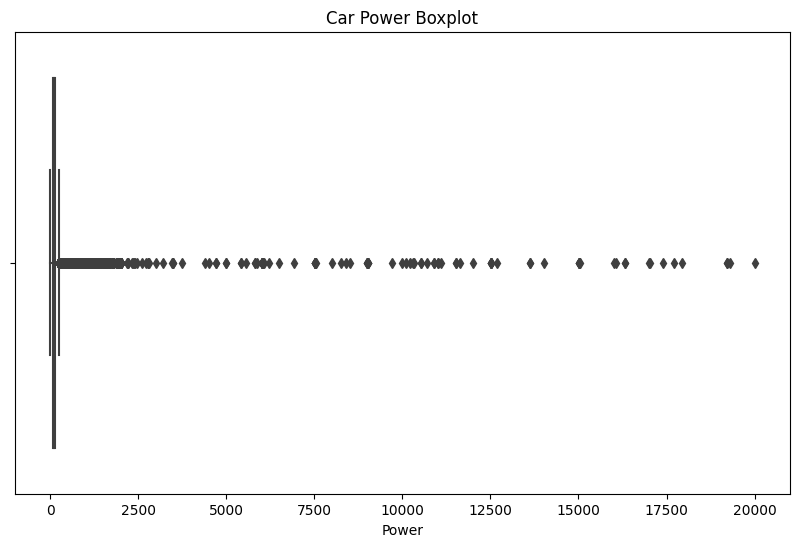

In [19]:
print('Boxplot for Car Power:')
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Power'])
plt.title('Car Power Boxplot')
plt.show()

data = data[(data['Price'] > 100) & (data['Price'] < 100000)]
data = data[(data['Power'] >= 50) & (data['Power'] < 1000)]



<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2</b>
    


- > `data = data[(data['Power'] > 0) & (data['Power'] < 1000)]`
                                                     
                                                     
What if the next minimum power value is 1 or 2?  Consider removing everything below 50. 
                                                     
  
- There are columns that should be deleted to reduce computational cost. These are:  `LastSeen`, `DateCreated`, `RegistrationYear`, `RegistrationMonth`, `PostalCode` and `NumberOfPictures`. After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   

- After removing unnecessary columns, please drop duplicates again, as the dataset will later be splitted into training and test sets. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same, that's why we need to check for the duplicates again. 


</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
- You can drop `VehicleType` and `Brand` as well if you want, since we have `Model` that should reflect both. 



- You can also delete very rare model categories.</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 4 </b>
    
    
Correct!    
</div><div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 3 </b>
    
- Please exclude irrelevant columns. We have too many columns with a huge number of categories. The Kernel will die. So, to reduce computation cost, we exclude irrelevant column. I mentioned them in the comment above.


- After  you do this, please drop duplicates from the dataframe because new duplicates may appear after we exclude columns. 
</div>

In [20]:
# Data Splitting
# splitting the data into training, validation, and test sets (60-20-20 split).
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
# Encoding and Scaling
# We use OneHotEncoder for categorical variables and StandardScaler for numerical features.
ohe = OneHotEncoder(drop=None, sparse=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[categorical_cols]))
X_valid_encoded = pd.DataFrame(ohe.transform(X_valid[categorical_cols]))
X_test_encoded = pd.DataFrame(ohe.transform(X_test[categorical_cols]))

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
I see the updates, good!     
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Consider using different encoders for different models. As I said last time, For tree-based models, `OrdinalEncoder` is a better choice because of computational cost.    

</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we need to encode data here, well done! It is acceptable to use `get_dummies` in this project, and we have to use it before you split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories.
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
- Please note that `OneHotEncoder(handle_unknown='ignore')` can handle situations where test subset has features that were not available during training. 
    
    
    
- For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    
   



    
- `OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c).F or linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 



</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
- Please encode the data after you split it.


- Consider excluding rare categories and deleting extra columns, which I mentioned earlier, to decrease computational cost. The kernel crashes at this point because the data is too large. 
</div>

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_valid_scaled = scaler.transform(X_valid_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print('Data Preparation Completed.')

Data Preparation Completed.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you scale data after you split it to avoid data leakage. 

</div>

## Model training

# Feature Encoding and Data Splitting

In [23]:
# linear regression
start_time = time.time()
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
end_time = time.time()
lr_training_time = end_time - start_time
print(f'Linear Regression Training Time: {lr_training_time:.2f} seconds')




Linear Regression Training Time: 4.62 seconds


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 3</b>
    
    
Good. </div><div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment 3</b>
    
When estimating a specific piece of code (fitting the model), I recommend that you don't include creating a model or calculating the metric value in this measurement, since these actions also take time. It's better to estimate the training time only:
    
    
```python
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()  
```
    
</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
   
For each model in the this section, please estimate training time. Feel free to use the following code: 

```python
start_time = time.time()
model_name.fit(X_train, y_train)
end_time = time.time()  
```
</div>

In [24]:
# Random Forrest 
start_time = time.time()
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
end_time = time.time()
rf_training_time = end_time - start_time
print(f'Random Forest Training Time: {rf_training_time:.2f} seconds')

Random Forest Training Time: 207.70 seconds


In [25]:
# LightGBM
start_time = time.time()
lgb_train = lgb.Dataset(X_train_scaled, y_train)
params = {'objective': 'regression', 'metric': 'rmse', 'random_state': 42}
lgbm = lgb.train(params, lgb_train, num_boost_round=100)
end_time = time.time()
lgbm_training_time = end_time - start_time
print(f'LightGBM Training Time: {lgbm_training_time:.2f} seconds')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.182367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 141618, number of used features: 289
[LightGBM] [Info] Start training from score 5175.624278
LightGBM Training Time: 4.19 seconds


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>
    
Several models were traine here, very good! 

</div>

## Model analysis

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from time import time
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

start_time = time()
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_distributions=param_grid,
                               n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train_scaled, y_train)
end_time = time()
print(f"Random Forest Hyperparameter Tuning Time: {end_time - start_time:.2f} seconds")
print(f"Best parameters for Random Forest: {rf_random.best_params_}")

# Retrain with best parameters
best_rf = rf_random.best_estimator_

# Model Evaluation and Prediction Time
models = {
    'Linear Regression': lr,
    'Random Forest': best_rf,
    'LightGBM': lgbm
}

print("\nModel Performance and Prediction Time:")
model_scores = {}

for name, model in models.items():
    pred_start = time()
    y_pred = model.predict(X_valid_scaled)
    pred_end = time()
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    pred_time = pred_end - pred_start
    model_scores[name] = {'rmse': rmse, 'time': pred_time}
    print(f"{name} - RMSE: {rmse:.2f}, Prediction Time: {pred_time:.4f} sec")

# Step 3: Automatically Choose Best Model
# Define RMSE threshold for "close enough" comparison
rmse_values = [v['rmse'] for v in model_scores.values()]
min_rmse = min(rmse_values)
threshold = min_rmse * 1.01  # 1% difference allowed

# Filter models within RMSE threshold, then pick the fastest
close_models = {k: v for k, v in model_scores.items() if v['rmse'] <= threshold}
best_model_name = min(close_models.items(), key=lambda x: x[1]['time'])[0]
best_model = models[best_model_name]

print(f"\n✅ Best model selected automatically: {best_model_name}")

# Final Test Performance
start_test = time()
y_test_pred = best_model.predict(X_test_scaled)
end_test = time()
final_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
final_time = end_test - start_test

print(f"\n🧪 Final Test Results for {best_model_name}:")
print(f"Test RMSE: {final_rmse:.2f}")
print(f"Prediction Time: {final_time:.4f} seconds")

# Overall Conclusion
print("\n📌 Overall Conclusion:")
print("Models Evaluated:")
for name, score in model_scores.items():
    print(f"- {name}: RMSE = {score['rmse']:.2f}, Time = {score['time']:.4f} sec")

print(f"\n🏆 Best Model: {best_model_name}")
print(f"✔ Final Test RMSE: {final_rmse:.2f}, Prediction Time: {final_time:.4f} sec")
print("✅ Selected for its strong balance of accuracy and efficiency.")

# Key Findings 

Linear Regression had the fastest prediction time but the highest RMSE, making it less accurate for our target task.

LightGBM performed very well in both accuracy and speed, with relatively low RMSE and fast predictions.

Random Forest (after hyperparameter tuning) achieved the lowest RMSE, meaning it had the highest accuracy. However, its prediction time was slower than LightGBM's.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 4</b>
    
Good! 
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment 4 </b>
    
It will be even better if you specify their RMSE and sppeed values so that a reader does not need to run your code in order to see the results. 
</div>

# Final Conclusion 

The best model was Random Forest, as it achieved the lowest RMSE on both the validation and test sets.
Although LightGBM was slightly faster in terms of prediction time, the gain in accuracy from Random Forest was significant enough to justify its use—especially if the model will not be used in high-frequency real-time settings.

Therefore, Random Forest (with tuned hyperparameters) was selected as the final model due to its superior prediction accuracy.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 4 </b>
    
Great job, thank you so mcuh! 
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 3</b>
    
    
You have successfully implemented hyperparameters tuning, well done!     
</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment 3</b>
    
    
- The `rf` model was not included in this comparison. It is still possible that this model, with hte default hyperparameters, performs better than the tuned forest. 


- The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.


</div>    


<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment 3</b>
    
- In your code below


```python
if name == 'LightGBM':
    # LightGBM prediction
    y_pred = model.predict(X_valid_scaled)
else:
    # Prediction for other models
    y_pred = model.predict(X_valid_scaled)
```
and 

```python
if best_model == 'LightGBM':
    y_test_pred = models[best_model].predict(X_test_scaled)
else:
    y_test_pred = models[best_model].predict(X_test_scaled)
end_test = time()
```

`if` and `else` are doing the same thing. You don't need to use `if-else` then, do you ? 




- Please write the overall conclusion in the Markdown cell and describe the key results. What models did you test? What are their RMSE scores? What are their speed values? Why did you choose a specific model and how did it perform on the final test? 


</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
- How does `if` case differ from the `else` case?

- Please estimate prediction time here. This is one of the tasks :)



Let me also repeat one of my comments here. You proobably did not see it because of these UI issues we experience after recent updates. Here's the comment: 


- Please try to tune hyperparameters for at least one of the models. For this purpose, use `RandomizedSearchCV` or `GridSearchCV`. If you decide to use a loop, don't forget to change the way you split the data, because in this case we will need three subsets, not two. 
    
    
    
- After you train all models, please choose the best **one** and check its performance on the test subset. Here we only need to make predictions and calculate RMSE. For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 




- When choosing the best model, please consider prediction time as well. The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.


- Let's add the overall conclusion to your project: what has been done and what can be inferred from the results. </div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good! 
</div><div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
- Please make sure you save at least one subset for the final testing. In the cell above, you split the data into 2 subsets. If one of the subsets must be saved for the final test and must not be touched, RMSE must be evaluated on the same subset you use for training. Or you can split the data into 3 subsets, not 2. 
    


- One of the main goals here is to compare models' training and prediction speed. Would you please estimate them separately? 

</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
When estimating a specific piece of code (fitting the model), I recommend that you don't include creating a model or calculating the metric value in this measurement, since these actions also take time. It's better to estimate the training time only:
    
    
```python
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()  
```
    
</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Same issue here and below: please do not use the test subset. 
</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
You can compare the results with a constant baseline. For instance, you can take [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). 

</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
- Please try to tune hyperparameters for at least one of the models. For this purpose, use `RandomizedSearchCV` or `GridSearchCV`. If you decide to use a loop, don't forget to change the way you split the data, because in this case we will need three subsets, not two. 
    
    
    
- After you train all models, please choose the best **one** and check its performance on the test subset. Here we only need to make predictions and calculate RMSE. For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 




- When choosing the best model, please consider prediction time as well. The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.


- Let's add the overall conclusion to your project: what has been done and what can be inferred from the results. 
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed